# Module 5 Exercises - Time Series

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consecutive days (1 week) starting from the variable with today's date.

In [1]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [3]:
date = np.array('2019-08-21', dtype = np.datetime64)
date

array('2019-08-21', dtype='datetime64[D]')

In [4]:
date + np.arange(7)

array(['2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27'], dtype='datetime64[D]')

In [10]:
date = pd.to_datetime("21st of July,2019")
date
 

Timestamp('2019-07-21 00:00:00')

In [11]:
date.strftime('%A')

'Sunday'

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28',
               '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [14]:
index = pd.DatetimeIndex(['2016-02-11','2016-07-01',
                          '2016-07-09','2016-10-08',
                         '2017-02-18','2017-02-25',
                          '2017-05-02','2017-08-26',
                          '2017-12-15','2018-02-11'])
data = pd.Series([0,1,2,3,4,5,6,7,8,9], index=index)
data

2016-02-11    0
2016-07-01    1
2016-07-09    2
2016-10-08    3
2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
2018-02-11    9
dtype: int64

In [15]:
data['2017']

2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
dtype: int64

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [18]:
dates = pd.to_datetime([datetime(2017,12,15), 
                       '8th of October 2016',
                       '20180211','2017-02-25',
                       '2019-Jan-16'])
dates

DatetimeIndex(['2017-12-15', '2016-10-08', '2018-02-11', '2017-02-25',
               '2019-01-16'],
              dtype='datetime64[ns]', freq=None)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [20]:
pd.timedelta_range(0, periods=5, freq='1H45T')

TimedeltaIndex(['00:00:00', '01:45:00', '03:30:00', '05:15:00', '07:00:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [21]:
from pandas.tseries.offsets import BDay
pd.date_range('2019-08-21',periods=20, freq=BDay())

DatetimeIndex(['2019-08-21', '2019-08-22', '2019-08-23', '2019-08-26',
               '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30',
               '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05',
               '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11',
               '2019-09-12', '2019-09-13', '2019-09-16', '2019-09-17'],
              dtype='datetime64[ns]', freq='B')

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Then using pandas, read the file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [22]:
data = pd.read_csv('datasets/smalltravel.csv', 
                   index_col="Date", parse_dates=True)
data.head()

,GoingTo,AvgSpeed,MovingTime
Date,,,
2012-01-06,Home,78.3,36.3
2012-01-06,GSK,81.8,34.9
2012-01-04,Home,82.0,35.9
2012-01-04,GSK,74.2,35.6
2012-01-03,Home,83.4,34.8


In [23]:
data.describe()

,AvgSpeed,MovingTime
count,205.000000,205.000000
mean,74.477561,37.871707
std,11.409816,4.835072
min,38.100000,27.100000
25%,68.900000,35.700000
50%,73.600000,37.600000
75%,79.900000,39.900000
max,107.700000,62.400000


Text(0, 0.5, 'Going To Home or GSK AvgSpeed and Moving Time')

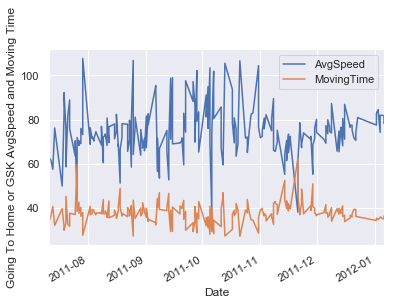

In [25]:
data.plot()
plt.ylabel('Going To Home or GSK AvgSpeed and Moving Time')

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

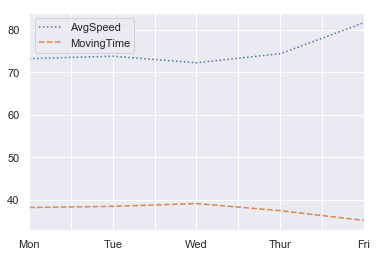

In [33]:
 
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tue','Wed','Thur','Fri']
by_weekday.plot( style=[':','--','-'])